# TightBinding.jl
Sample codes


## 2D square lattice

In [1]:
] activate .

In [21]:
using TightBinding
#Make 2D lattice
la2 = set_Lattice(2,[[1,0],[0,1]])
#Add one atom
add_atoms!(la2,[0,0])
#Show possible neighber hoppings
show_neighbers(la2)

Possible hoppings
(1,1), x:-1//1, y:-1//1
(1,1), x:-1//1, y:0//1
(1,1), x:-1//1, y:1//1
(1,1), x:0//1, y:-1//1
(1,1), x:0//1, y:0//1
(1,1), x:0//1, y:1//1
(1,1), x:1//1, y:-1//1
(1,1), x:1//1, y:0//1
(1,1), x:1//1, y:1//1


In [3]:
#Add hoppings
t = 1.0
#x diretion
add_hoppings!(la2,-t,1,1,[1,0])
#y direction
add_hoppings!(la2,-t,1,1,[0,1])
#make Hamiltonian 
ham2 = hamiltonian_k(la2)

#6 (generic function with 1 method)

In [4]:
#We can show energies
        kmin = [-π,-π]
        kmax = [0.0,0.0]
        nk = 20
        vec_k,energies = calc_band(kmin,kmax,nk,la2,ham2)
        println(energies)

[4.0 3.94545 3.78327 3.5179 3.15656 2.70913 2.18779 1.60678 0.981942 0.330317 -0.330317 -0.981942 -1.60678 -2.18779 -2.70913 -3.15656 -3.5179 -3.78327 -3.94545 -4.0]


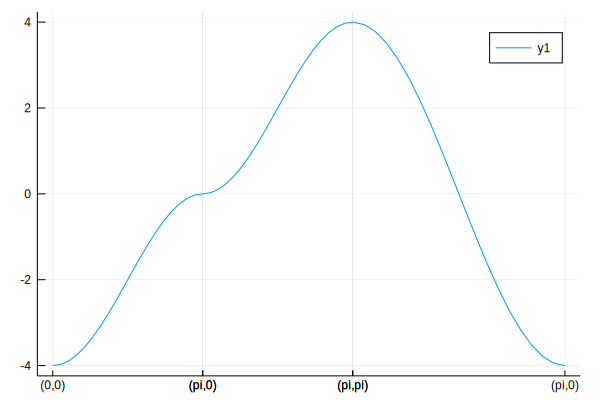

In [5]:
#We plot the band structure.
#We initialize kline
        klines = set_Klines()
#We add line where we want to calculate energies
        kmin = [0,0] #minimum value of k
        kmax = [π,0] #macimum value of k
        #Add line from kmin to kmax
        add_Kpoints!(klines,kmin,kmax,"(0,0)","(pi,0)")

        kmin = [π,0]
        kmax = [π,π]
        add_Kpoints!(klines,kmin,kmax,"(pi,0)","(pi,pi)")

        kmin = [π,π]
        kmax = [0,0]
        add_Kpoints!(klines,kmin,kmax,"(pi,pi)","(pi,0)")

#plot the band structure
calc_band_plot(klines,la2)

## Graphene

In [6]:
#Primitive vectors
a1 = [sqrt(3)/2,1/2]
a2= [0,1]
#set lattice
la = set_Lattice(2,[a1,a2])
#add atoms
add_atoms!(la,[1/3,1/3])
add_atoms!(la,[2/3,2/3])
show_neighbers(la)

Possible hoppings
(1,1), x:-1//1, y:-1//1
(1,2), x:-2//3, y:-2//3
(2,2), x:-1//1, y:-1//1
(1,1), x:-1//1, y:0//1
(1,2), x:-2//3, y:1//3
(2,2), x:-1//1, y:0//1
(1,1), x:-1//1, y:1//1
(1,2), x:-2//3, y:4//3
(2,2), x:-1//1, y:1//1
(1,1), x:0//1, y:-1//1
(1,2), x:1//3, y:-2//3
(2,2), x:0//1, y:-1//1
(1,1), x:0//1, y:0//1
(1,2), x:1//3, y:1//3
(2,2), x:0//1, y:0//1
(1,1), x:0//1, y:1//1
(1,2), x:1//3, y:4//3
(2,2), x:0//1, y:1//1
(1,1), x:1//1, y:-1//1
(1,2), x:4//3, y:-2//3
(2,2), x:1//1, y:-1//1
(1,1), x:1//1, y:0//1
(1,2), x:4//3, y:1//3
(2,2), x:1//1, y:0//1
(1,1), x:1//1, y:1//1
(2,2), x:1//1, y:1//1


In [7]:
#construct hoppings
        t = 1.0
        add_hoppings!(la,-t,1,2,[1/3,1/3])
        add_hoppings!(la,-t,1,2,[-2/3,1/3])
        add_hoppings!(la,-t,1,2,[1/3,-2/3])

3-element Array{TightBinding.Hopping,1}:
 TightBinding.Hopping(-1.0, [1, 2], [0.333333, 0.333333]) 
 TightBinding.Hopping(-1.0, [1, 2], [-0.666667, 0.333333])
 TightBinding.Hopping(-1.0, [1, 2], [0.333333, -0.666667])

Plot the 2D lattice structure


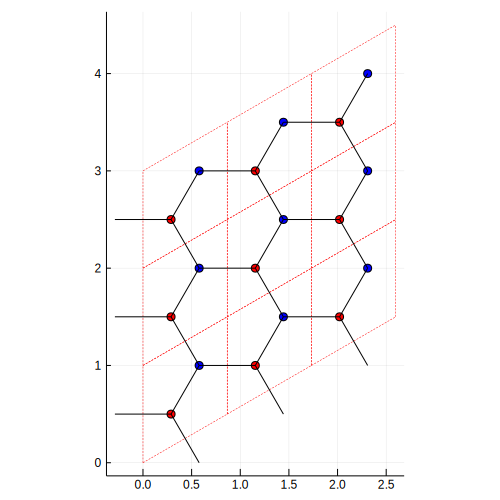

In [11]:
#show the lattice structure
plot_lattice_2d(la)

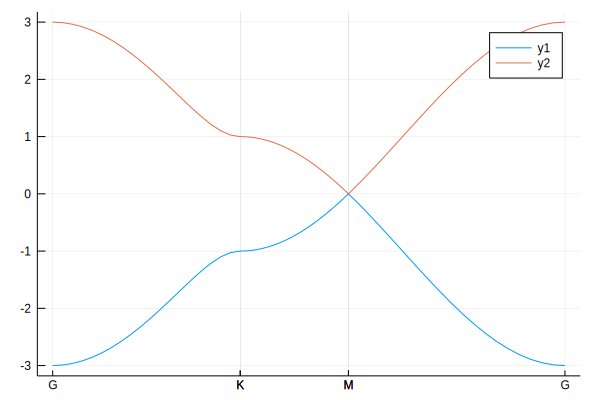

In [9]:
#show the band structure
        klines = set_Klines()
        kmin = [0,0]
        kmax = [2π/sqrt(3),0]
        add_Kpoints!(klines,kmin,kmax,"G","K")

        kmin = [2π/sqrt(3),0]
        kmax = [2π/sqrt(3),2π/3]
        add_Kpoints!(klines,kmin,kmax,"K","M")

        kmin = [2π/sqrt(3),2π/3]
        kmax = [0,0]
        add_Kpoints!(klines,kmin,kmax,"M","G")
calc_band_plot(klines,la)

# Graphene nano ribbon
Periodic and open boundary conditions

In [12]:
#We have already constructre atoms and hoppings.
#We add the line to plot
klines = set_Klines()
kmin = [-π]
kmax = [π]
add_Kpoints!(klines,kmin,kmax,"-pi","pi")

1-element Array{TightBinding.Kpoints,1}:
 TightBinding.Kpoints([-3.14159], Irrational{:π}[π = 3.1415926535897...], 20, "-pi", "pi")

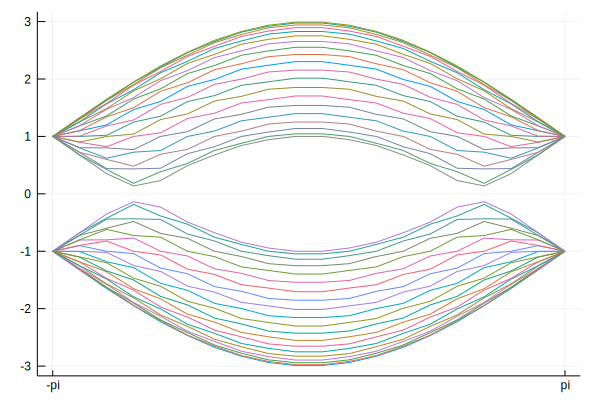

In [22]:

#We consider the periodic boundary condition along the primitive vector
direction = 1
#Periodic boundary condition
TightBinding.calc_band_plot_finite(klines,la,direction,periodic=true)

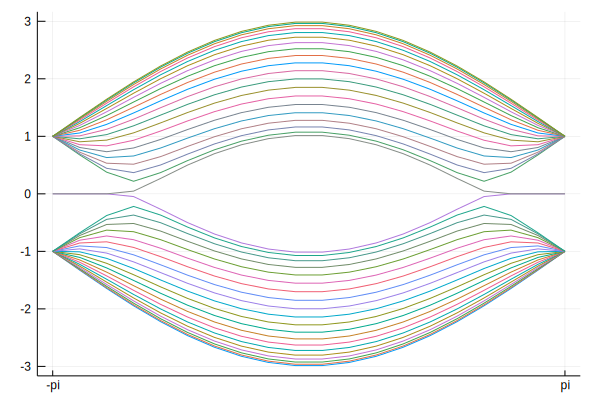

In [23]:
#We introduce the surface perpendicular to the premitive vector
direction = 1
#Open boundary condition
TightBinding.calc_band_plot_finite(klines,la,direction,periodic=false)